# Markovic


[TO DO]
- Create portfolios
  - equally weighted always
  - equally weighted start of the year
  - market portfolios
  - sectors
  - industries
- Create frontier
- Function to plot mean and variance of stocks
- Function to plot efficient frontier

### Variables

$$
\begin{equation}
C : \textrm{number of stocks}\\
T : \textrm{number of time observations} \\
\boldsymbol{\mu} : \textrm{mean stock return (C x 1)} \\
\boldsymbol{\Sigma} : \textrm{covariance matrix of returns (C x C)}
\end{equation}
$$

### Global Minimum Variance Portfolio

$$
\begin{equation}
\boldsymbol{w}_{gmv} = \frac{1}{\iota' \Sigma^{-1} \iota} \Sigma^{-1} \iota \\
\mu_{gmv} = \frac{1}{\iota' \Sigma^{-1} \iota}\mu' \Sigma^{-1} \iota \\
\sigma_{gmv}^2 = \frac{1}{\iota' \Sigma^{-1} \iota}
\end{equation}
$$

### Efficient Frontier

$$
\begin{equation}
\boldsymbol{w} = \lambda \boldsymbol{w}_{mu} + (1-\lambda) \boldsymbol{w}_{gmv}
\end{equation}
$$


In [6]:
from pathlib import Path
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

In [7]:
def preprocess_column_name(column_name):
    column_name = column_name.title().replace(' ','').strip()
    return column_name


### Preprocess data (only do this once)



In [76]:
path_processed_ticker_data = Path('data') / 'tickers.csv'
path_returns = Path('data') / 'returns.csv'
raw_ticker_path = Path('data/nasdaq_screener_1614797288539.csv')
selected_columns = ['Symbol', 'Name', 'MarketCap', 'Country', 'Sector', 'Industry']

if not path_processed_ticker_data.exists():
    print('create processed ticker table')
    df_tickers = pd.read_csv(raw_ticker_path)
    df_tickers.columns = [preprocess_column_name(e) for e in df_tickers.columns]
    df_tickers = df_tickers[selected_columns]
    df_tickers.to_csv(path_processed_ticker_data, index=False)
else:
    df_tickers = pd.read_csv(path_processed_ticker_data)
    print('load ticker table')

if not path_returns.exists():
    print('get returns table')
    tickers = df_tickers['Symbol'].tolist()
    df_returns = yf.download( 
    tickers = ' '.join(df_tickers['Symbol'].tolist()[:250]),
    period = "1y",
    interval = "1d",
    group_by = 'ticker',
    auto_adjust = True,
    prepost = False,
    threads = True,
    proxy = None
    )
    df_returns.to_csv(path_returns, index=False)
else:
    print('load returns table')
    df_returns = pd.read_csv(path_returns, header =[0,1])


load ticker table
load returns table


### Analysis

In [77]:
print(f"""
Number of unique Sectors : {df_tickers.Sector.unique().size}
Number of unique Industries : {df_tickers.Industry.unique().size}
""")


Number of unique Sectors : 13
Number of unique Industries : 134



In [78]:
data = df_returns
data.columns = data.columns.swaplevel()
data.sort_index(axis=1, level=0, inplace=True)
df = data['Close']
print(df.shape)
df.head(2)


(254, 250)


,A,AA,AAIC,AAIC^B,AAIC^C,AAN,AAP,AAT,AB,ABB,...,ATCO^D,ATCO^E,ATCO^G,ATCO^H,ATCO^I,ATEN,ATGE,ATH,AX,BANC^E
0,79.673676,12.94,6.00,NaN,NaN,NaN,129.333755,40.629932,28.571476,20.711140,...,NaN,NaN,NaN,NaN,NaN,6.51,29.870001,40.529999,23.590000,NaN
1,83.671242,12.88,6.04,NaN,NaN,NaN,131.884094,41.705006,29.603853,21.323954,...,NaN,NaN,NaN,NaN,NaN,6.60,31.320000,42.049999,23.959999,NaN


In [79]:
print(f"""
number of time steps: {df.shape[1]}
number of companies: {df.shape[0]}
number of companies with full history: {df.isnull().sum().eq(0).sum()}
number of companies with no history: {df.notnull().sum().eq(0).sum()}
""")

(df.notnull().mean()>0.9).mean()


number of time steps: 250
number of companies: 254
number of companies with full history: 163
number of companies with no history: 60



0.664

In [80]:
df = df.T[df.isnull().sum().eq(0)].T
print(df.shape)
df.head(2)


(254, 163)


,A,AA,AAIC,AAP,AAT,AB,ABB,ABBV,ABC,ABEV,...,ASIX,ASPN,ASR,ASX,AT,ATCO,ATEN,ATGE,ATH,AX
0,79.673676,12.94,6.00,129.333755,40.629932,28.571476,20.711140,83.125305,84.387764,3.180123,...,14.63,8.50,164.250000,4.575711,2.20,9.669414,6.51,29.870001,40.529999,23.590000
1,83.671242,12.88,6.04,131.884094,41.705006,29.603853,21.323954,87.093140,88.819901,3.296469,...,14.66,8.54,168.160004,4.702004,2.28,9.575168,6.60,31.320000,42.049999,23.959999


### Get stock prices and Returns

In [73]:
# df = df.stack().reset_index()
# df['Variable'] = 'Price'
# df.columns = ['Time', 'Company', 'Value', 'Variable']
# df

In [72]:
# time = 2
# company = 'A'
# df.query('Time == @time and Variable == "Price" and Company == @company').iloc[0]['Value']

In [71]:
# def get_stock_return(time, company):
#     time_old = time-1
#     old_price = df.query('Time == @time_old and Variable == "Price" and Company == @company').iloc[0]['Value']
#     new_price = df.query('Time == @time and Variable == "Price" and Company == @company').iloc[0]['Value']
#     _stock_return = (new_price-old_price)/old_price

#     return _stock_return


In [69]:
# from tqdm import tqdm

# tqdm.pandas(desc="my bar!")

# df[df['Time']>0].head(1000).progress_apply(lambda x: get_stock_return(x['Time'], x['Company']), axis=1)


In [90]:
p = df.to_numpy()
T, C = p.shape
r = np.divide((p[1:,:]-p[:-1,:]), p[:-1,:])
r_log = np.log(1+r)
u = r_log.mean(0)
Sigma = np.cov(r_log.T)
iota = np.ones((C,1))

In [92]:
# company time return, company industry weight
A = np.matmul(np.matmul(iota.T, np.linalg.inv(Sigma)), iota)
B = 

array([[92674.94791458]])

In [89]:
Sigma.shape

(163, 163)

### Get industry prices and returns (equally weighted)

In [ ]:
returns table
ticker, time, return 

In [ ]:
industries equally weighted industry (I*C) * returns (C*T) = I*C*R
(C*R)


In [ ]:
G*C*T inner product G*C*T

In [212]:
vol = np.sqrt(Sigma.diagonal())
x = vol
y = u

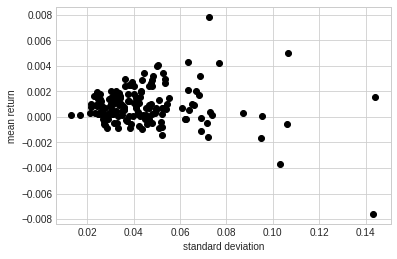

In [221]:
plt.style.use('seaborn-whitegrid')
plt.plot(x, y, 'o', color='black')
plt.xlabel('standard deviation')
plt.ylabel('mean return')
plt.show()
